In [5]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import learning_curve

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

pd.set_option('display.max_columns', None)


In [ ]:
data_result = pd.read_excel('data_sold_flats_result.xlsx')
display(data_result.info())
display(data_result.shape)

In [48]:
# преобразуем дату продажи
data_result['date_sold'] = data_result['date_sold'].apply(lambda x: x.value)


In [ ]:
display(data_result.info())
display(data_result.shape)

In [ ]:
!pip install catboost


In [84]:
# Разделяем датасет на тренировочную и тестовую выборки (70/30)
X_train, X_test, y_train, y_test = train_test_split(data_result.drop('sold_price', axis=1),
                                                    data_result['sold_price'],
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
# Классификатор CatBoost
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor()
cb_model.fit(X_train, y_train)
preds = cb_model.predict(X_valid)

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score

In [ ]:
# Находим лучшие гипер параметры для модели CatBoostRegressor
cat_model = CatBoostRegressor()

# задаем сетку гипер параметров для перебора
parameters = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

# создаем объект для поиска по сетке с кросс-валидацией
grid_search = GridSearchCV(estimator=cat_model,
                           param_grid=parameters,
                           cv=3,
                           n_jobs=-1,
                           verbose=3)

# запускаем перебор гипер параметров на обучающей выборке
grid_search.fit(X_train, y_train)

In [87]:
# Выводим лучший score и гипер параметры
display("Best score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

"Best score: 0.996256 using {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.1}"

In [ ]:
# Обучаем модель CatBoostRegressor на лучших гипер параметров
from catboost import CatBoostRegressor
best_model = CatBoostRegressor(**grid_search.best_params_)
best_model.fit(X_train, y_train)

In [89]:
# Выводим метрики модель

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

In [90]:

display("Train score: {:.4f}".format(best_model.score(X_train, y_train)))
display("Test score: {:.4f}".format(best_model.score(X_test, y_test)))
display("Train RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
display("Test RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
display("Train R^2: {:.4f}".format(r2_score(y_train, y_train_pred)))
display("Test R^2: {:.4f}".format(r2_score(y_test, y_test_pred)))
display("Train MAE: {:.4f}".format(train_mae))
display("Test MAE: {:.4f}".format(test_mae))
display("Train MSE: {:.4f}".format(train_mse))
display("Test MSE: {:.4f}".format(test_mse))
display("Train MAPE: {:.4f}%".format(train_mape))
display("Test MAPE: {:.4f}%".format(test_mape))

'Train score: 0.9997'

'Test score: 0.9928'

'Train RMSE: 19558.5467'

'Test RMSE: 97043.4734'

'Train R^2: 0.9997'

'Test R^2: 0.9928'

'Train MAE: 12303.2666'

'Test MAE: 18946.2265'

'Train MSE: 382536747.8173'

'Test MSE: 9417435732.5036'

'Train MAPE: 0.0051%'

'Test MAPE: 0.0066%'

Выходные данные были обрезаны до нескольких последних строк (5000).
0:	learn: 1042442.7231386	total: 6.58ms	remaining: 6.57s
1:	learn: 961062.2205370	total: 15.4ms	remaining: 7.69s
2:	learn: 886019.8018642	total: 22.3ms	remaining: 7.4s
3:	learn: 817191.0307428	total: 28.5ms	remaining: 7.09s
4:	learn: 758438.4826637	total: 34.7ms	remaining: 6.9s
5:	learn: 703491.6014990	total: 40.9ms	remaining: 6.78s
6:	learn: 650095.7838680	total: 51.9ms	remaining: 7.37s
7:	learn: 602969.4573147	total: 59ms	remaining: 7.32s
8:	learn: 558646.0237236	total: 65ms	remaining: 7.16s
9:	learn: 517787.8082102	total: 71.1ms	remaining: 7.04s
10:	learn: 480863.9346648	total: 77.3ms	remaining: 6.95s
11:	learn: 447421.2026845	total: 83.5ms	remaining: 6.87s
12:	learn: 416067.3053047	total: 93.8ms	remaining: 7.12s
13:	learn: 387972.6138359	total: 104ms	remaining: 7.33s
14:	learn: 362377.7596388	total: 110ms	remaining: 7.25s
15:	learn: 338180.6959708	total: 117ms	remaining: 7.18s
16:	learn: 315673.1610077	total: 123ms

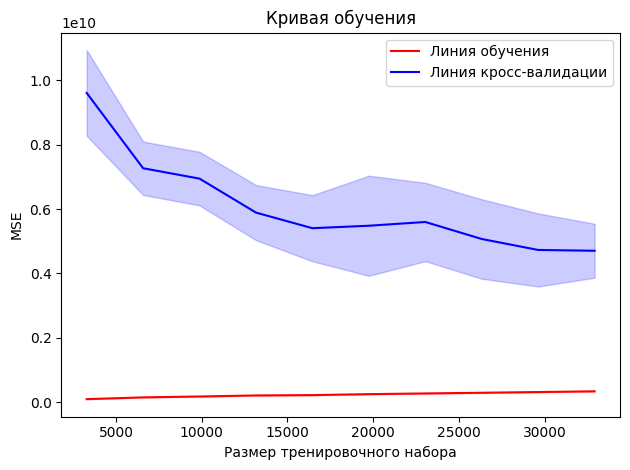

In [91]:
# Выводим график "Кривая обучения" модели

# Вычислим оценки кросс-валидации для разных размеров обучающего набора
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Преобразуем отрицательные значения оценок в положительные
train_scores = -train_scores
test_scores = -test_scores

# Вычислим среднюю оценку и стандартное отклонение для каждого размера обучающего набора
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, label="Линия обучения", color="r")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.plot(train_sizes, test_mean, label="Линия кросс-валидации", color="b")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="b", alpha=0.2)

plt.title("Кривая обучения")
plt.xlabel("Размер тренировочного набора"), plt.ylabel("MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [92]:
# Сохраняем лучшую модель
best_model.save_model('catboost_model.dump')


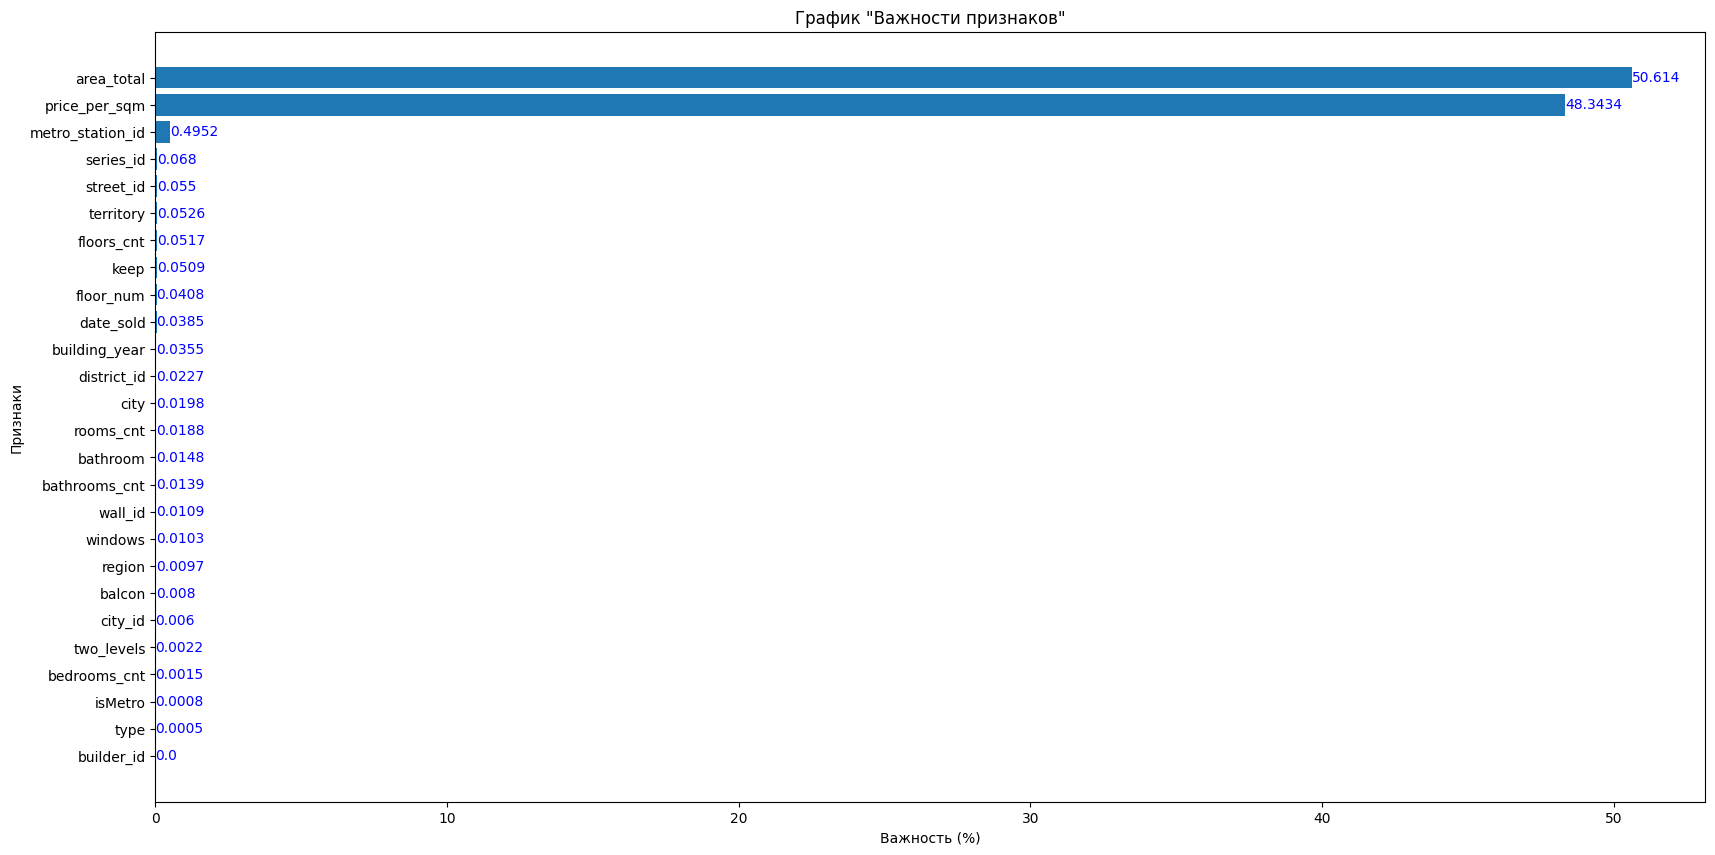

In [100]:
# Выводим график "Важности признаков"
importance = best_model.get_feature_importance()

# Задаем названия признаков
feature_names = [ 'city_id', 'district_id', 'street_id', 'date_sold','metro_station_id', 'floor_num', 'floors_cnt',
                 'rooms_cnt', 'bedrooms_cnt', 'building_year', 'area_total', 'builder_id', 'type', 'two_levels', 'bathroom', 'bathrooms_cnt',
                 'windows', 'territory', 'keep', 'series_id', 'wall_id', 'balcon', 'city','region', 'isMetro', 'price_per_sqm']


# Создаем словарь из названий признаков и их важности
feature_importance_dict = dict(zip(feature_names, importance))

# Сортируем словарь по убыванию важности признаков
sorted_feature_importance_dict = dict(sorted(feature_importance_dict.items(),
                                             key=lambda x: x[1], reverse=False))

# Создаем список с названиями признаков, отсортированный по убыванию важности
sorted_feature_names = list(sorted_feature_importance_dict.keys())

# Создаем список с важностью признаков, отсортированный по убыванию
sorted_importance = list(sorted_feature_importance_dict.values())

# Создаем график важности признаков с горизонтальными линиями
plt.figure(figsize=(20, 10))
plt.barh(sorted_feature_names, sorted_importance)
plt.title('График "Важности признаков"')
plt.xlabel('Важность (%)')
plt.ylabel('Признаки')

# Добавляем цифры над каждой линией
for i, v in enumerate(sorted_importance):
    plt.text(v, i, str(round(v,4)), color='blue', va='center')

plt.show()

In [101]:
# Выводим систему оценивания объектов недвижимости по их параметрам
# Добавляем столбец 'sold_price_predict' - Предсказанная цена продажи (Руб.)

data_result['sold_price_predict'] = best_model.predict(data_result)

In [103]:
# Выводим сравние 'sold_price' и 'sold_price_predict'
data_result['sold_price_predict'] = data_result['sold_price_predict'].astype(int)

df = pd.DataFrame(data_result)

df = df.rename(columns={'sold_price': 'Исходная цена продажи (Руб.)', 'sold_price_predict': 'Предсказанная цена продажи (Руб.)'})

display(df[['Исходная цена продажи (Руб.)','Предсказанная цена продажи (Руб.)']].head(10))

,Исходная цена продажи (Руб.),Предсказанная цена продажи (Руб.)
0,4880000,4897639
1,2550000,2552171
2,2200000,2198519
3,2200000,2201898
4,2000000,2004072
5,4300000,4280608
6,3450000,3454422
7,9600000,9167425
8,3100000,3094949
9,3500000,3476419


In [104]:
# сохраняем предсказанную стоимость
data_result.to_excel('data_sold_price_predict.xlsx', index=False)